# Receipts by Source: 1934–2020

**Source:** http://www.whitehouse.gov/sites/default/files/omb/budget/fy2016/assets/hist02z1.xls

I cleaned the data a little and obtained `taxes.csv`.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# Load the data into a DataFrame of pandas
df = pd.DataFrame.from_csv("taxes.csv", parse_dates=True)
df[:5] # Sample. First 6 lines

,IndivTax,CorpTax,SI,ExciseTaxes,Other,Total
1934-01-01,420,364,30,1354,788,2955
1935-01-01,527,529,31,1439,1084,3609
1936-01-01,674,719,52,1631,847,3923
1937-01-01,1092,1038,580,1876,801,5387
1938-01-01,1286,1287,1541,1863,773,6751


In [3]:
# Generate the right value of the ratios and set them
# as stacked array
y_stack = np.array([(df['IndivTax']/df['Total']).tolist(), 
                    (df['CorpTax']/df['Total']).tolist(), 
                    (df['SI']/df['Total']).tolist(), 
                    (df['ExciseTaxes']/df['Total']).tolist(), 
                    (df['Other']/df['Total']).tolist()])

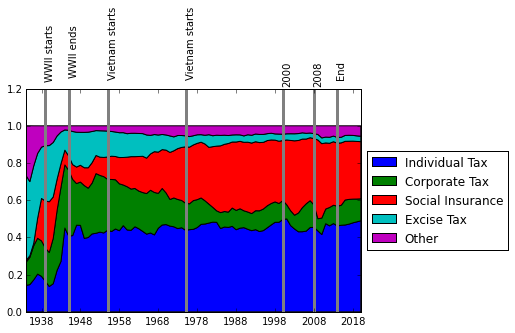

In [4]:
sp = plt.stackplot(df.index,y_stack)
# Important years
plt.vlines(df.index[80],0,1.2, linewidth=3, color='gray') # Last Data
plt.text(df.index[80], 1.3, 'End', rotation=90)
plt.vlines(df.index[74],0,1.2, linewidth=3, color='gray', label="2008") # 2008
plt.text(df.index[74], 1.3, '2008', rotation=90)
plt.vlines(df.index[66],0,1.2, linewidth=3, color='gray') # 2000
plt.text(df.index[66], 1.3, '2000', rotation=90)
plt.vlines(df.index[21],0,1.2, linewidth=3, color='gray') #Vietnam starts
plt.text(df.index[21], 1.6, 'Vietnam starts', rotation=90)
plt.vlines(df.index[41],0,1.2, linewidth=3, color='gray') #Vietnam ends
plt.text(df.index[41], 1.6, 'Vietnam starts', rotation=90)
plt.vlines(df.index[5],0,1.2, linewidth=3, color='gray') #WWII starts
plt.text(df.index[5], 1.5, 'WWII starts', rotation=90)
plt.vlines(df.index[11],0,1.2, linewidth=3, color='gray') ##WWII endds
plt.text(df.index[11], 1.5, 'WWII ends', rotation=90)

proxy = [matplotlib.patches.Rectangle((0,0), 0,0, facecolor=pol.get_facecolor()[0]) for pol in sp]
plt.legend(proxy, ('Individual Tax','Corporate Tax','Social Insurance', 'Excise Tax', 'Other'), 
           loc='center left', bbox_to_anchor=(1.,0.5))